In [55]:
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime

# Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import itertools

# Scikit-Learn for Modeling
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from datetime import datetime, timedelta
from joblib import dump

In [56]:
# Root Mean Square Percentage Error
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [57]:
# The training Set
df_train_store = pd.read_csv("../data/clean_train.csv",sep=',', low_memory = False)

# The test Set
df_test_store = pd.read_csv("../data/clean_train.csv",sep=',', low_memory = False)

In [58]:
features = df_train_store.drop(['Customers', 'Sales', 'SalesperCustomer'], axis = 1)
targets=np.log(df_train_store.Sales)

In [59]:
X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, targets, test_size=0.20, random_state=15)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [60]:
rfr = RandomForestRegressor(n_estimators=10,
                            criterion='mse',
                            max_depth=5,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='auto',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=4,
                            random_state=31,
                            verbose=0,
                            warm_start=False)
rfr.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=5, max_features='auto',
                      n_estimators=10, n_jobs=4, random_state=31)

<h3>Test our RF on the validation set</h3>

In [61]:
rfr_val=RandomForestRegressor(n_estimators=128,
                             criterion='mse',
                             max_depth=20,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=4,
                             random_state=35,
                             verbose=0,
                             warm_start=False)
model_RF_test=rfr_val.fit(X_train,y_train)

In [62]:
yhat=model_RF_test.predict(X_train_test)

(array([2.0000e+01, 2.3100e+02, 9.3200e+02, 5.9060e+03, 2.8602e+04,
        7.3568e+04, 4.7568e+04, 1.0021e+04, 1.9310e+03, 8.9000e+01]),
 array([ 6.51439833,  6.91015948,  7.30592062,  7.70168176,  8.0974429 ,
         8.49320404,  8.88896518,  9.28472632,  9.68048746, 10.0762486 ,
        10.47200974]),
 <BarContainer object of 10 artists>)

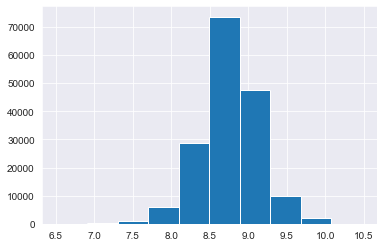

In [63]:
plt.hist(yhat)

In [64]:
error=rmspe(y_train_test,yhat)
error

0.1611521352032968

<h3>Export Model</h3>

In [65]:
model_timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
dump(filename=f'../models/{model_timestamp}.pkl', value=rfr, compress=9)

['../models/2022-05-28-18-25-20.pkl']

<h3>Feature Importance</h3>

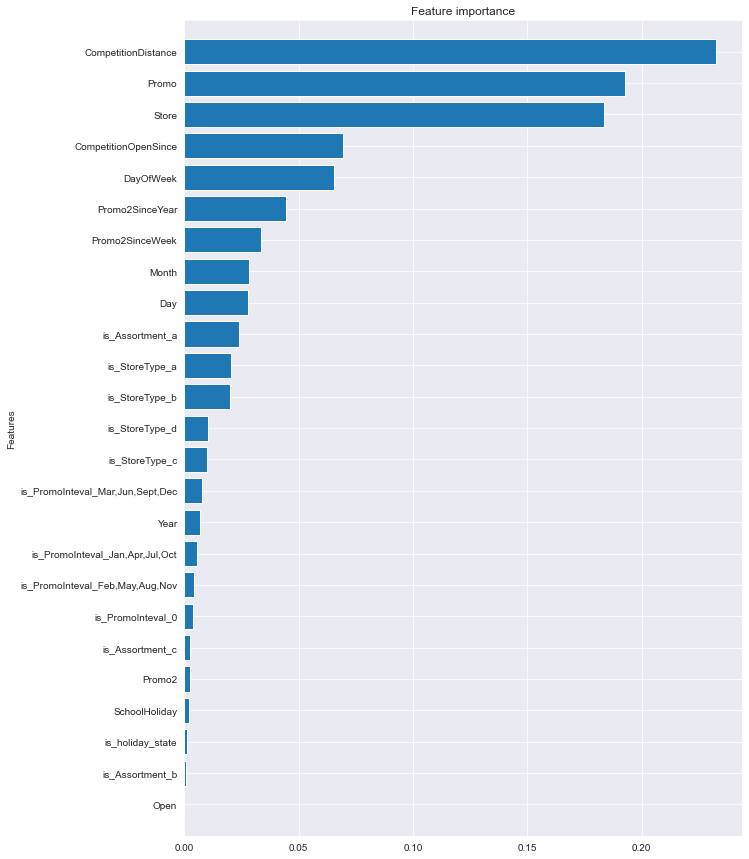

In [66]:
importance = rfr_val.feature_importances_
std = np.std([rfr_val.feature_importances_ for tree in rfr_val.estimators_],
             axis=0)
indices = np.argsort(importance)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,15))
plt.title("Feature importance")
plt.barh(range(X_train.shape[1]), importance[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()